##1) Importing Libraies

In [43]:
from IPython.display import clear_output

In [44]:
!pip install PyArabic==0.6.15 # Install PyArabic
clear_output()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from pyarabic.araby import strip_tashkeel, normalize_hamza
import re
from sklearn.preprocessing import MinMaxScaler

##2) Downloading the SA_Aqar.csv file from a public Google Drive link.

In [46]:
file_id = '1RxzxWvIwXna2TGubC03LZcNfvjaHKtQ0'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df.to_csv('SA_Aqar.csv', index=False)
clear_output()

In [47]:
"""
Dataset Source: https://www.kaggle.com/datasets/lama122/saudi-arabia-real-estate-aqar/data

Dataset Summary:

Goal: Analyze the relationship between house features and predict house prices.

Cities: Riyadh, Jeddah, Dammam, Al-Khobar

City Highlights:

- Riyadh: Capital of Saudi Arabia, largest city in the Middle East, diverse population, continuous growth.
- Jeddah: Economic and tourism hub, located on the Red Sea coast.
- Dammam: Major industrial complex on the Persian Gulf, includes Khobar, Qatif, and Dhahran.
- Al-Khobar: Developing industrial city in the Eastern Province, known for manufacturing various products.

In essence: This dataset focuses on houses in four major Saudi Arabian cities, aiming to understand the factors influencing their prices. It includes information about various house features that may be relevant to predicting price.
"""
# df = pd.read_csv('SA_Aqar.csv')
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


##3) Exploring The Dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [49]:
df.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


### Dealing with Nulls

In [50]:
df.isnull().sum()

,0
city,0
district,0
front,0
size,0
property_age,0
bedrooms,0
bathrooms,0
livingrooms,0
kitchen,0
garage,0


Good!
Now, we will drop any row contain at least one missing value (null)

In [51]:
df.dropna(inplace=True)

###Converting categorical data to numerical values

In [52]:
df.head(2)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3638 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3638 non-null   object
 1   district      3638 non-null   object
 2   front         3638 non-null   object
 3   size          3638 non-null   int64 
 4   property_age  3638 non-null   int64 
 5   bedrooms      3638 non-null   int64 
 6   bathrooms     3638 non-null   int64 
 7   livingrooms   3638 non-null   int64 
 8   kitchen       3638 non-null   int64 
 9   garage        3638 non-null   int64 
 10  driver_room   3638 non-null   int64 
 11  maid_room     3638 non-null   int64 
 12  furnished     3638 non-null   int64 
 13  ac            3638 non-null   int64 
 14  roof          3638 non-null   int64 
 15  pool          3638 non-null   int64 
 16  frontyard     3638 non-null   int64 
 17  basement      3638 non-null   int64 
 18  duplex        3638 non-null   int64 
 19  stairs     

#### 'city' column

In [54]:
print("length: "+ str(len(df['city'].unique())))
df['city'].unique()

length: 4


array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [55]:
print("Original 'city' column value counts:")
print(df['city'].value_counts())

Original 'city' column value counts:
city
الخبر     971
الرياض    928
الدمام    887
جدة       852
Name: count, dtype: int64


In [56]:
# Create a dictionary mapping city names to numerical values
city_mapping = {city: i for i, city in enumerate(df['city'].unique())}

# Create a new column with the encoded values
df['city_encoded'] = df['city'].map(city_mapping)

# Drop the original 'city' column (optional)
# df.drop('city', axis=1, inplace=True)
# df.head()

#### 'district' column

In [57]:
print("length: "+ str(len(df['district'].unique())))
df['district'].unique()

length: 174


array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي النسيم الشرقي ',
       '   حي الزهرة ', '   حي اليرموك ', '   حي المصيف ',
       '   حي المحمدية ', '   حي ام سليم ', 

In [58]:
print("\nOriginal 'district' column value counts:")
print(df['district'].value_counts())


Original 'district' column value counts:
district
حي ضاحية الملك فهد       168
حي اللؤلؤ                149
حي التحلية               148
حي الصواري               148
حي العارض                133
                        ... 
حي بني مالك                1
حي الاصالة                 1
حي البغدادية الشرقية       1
حي الجامعة                 1
حي الثقبة                  1
Name: count, Length: 174, dtype: int64


In [59]:
# Create a dictionary mapping district names to numerical values
district_mapping = {district: i for i, district in enumerate(df['district'].unique())}

# Create a new column with the encoded values
df['district_encoded'] = df['district'].map(district_mapping)
# Create a MinMaxScaler object
scaler = MinMaxScaler() #MinMaxScaler is used for normalization, which scales data to a specific range (0 to 1 in this case).

# Fit and transform the 'district_encoded' column
df['district_encoded'] = scaler.fit_transform(df[['district_encoded']])
# Drop the original 'district' column (optional)
# df.drop('district', axis=1, inplace=True)
# df.head()

In [60]:
df['district_encoded'].unique()

array([0.        , 0.00578035, 0.01156069, 0.01734104, 0.02312139,
       0.02890173, 0.03468208, 0.04046243, 0.04624277, 0.05202312,
       0.05780347, 0.06358382, 0.06936416, 0.07514451, 0.08092486,
       0.0867052 , 0.09248555, 0.0982659 , 0.10404624, 0.10982659,
       0.11560694, 0.12138728, 0.12716763, 0.13294798, 0.13872832,
       0.14450867, 0.15028902, 0.15606936, 0.16184971, 0.16763006,
       0.1734104 , 0.17919075, 0.1849711 , 0.19075145, 0.19653179,
       0.20231214, 0.20809249, 0.21387283, 0.21965318, 0.22543353,
       0.23121387, 0.23699422, 0.24277457, 0.24855491, 0.25433526,
       0.26011561, 0.26589595, 0.2716763 , 0.27745665, 0.28323699,
       0.28901734, 0.29479769, 0.30057803, 0.30635838, 0.31213873,
       0.31791908, 0.32369942, 0.32947977, 0.33526012, 0.34104046,
       0.34682081, 0.35260116, 0.3583815 , 0.36416185, 0.3699422 ,
       0.37572254, 0.38150289, 0.38728324, 0.39306358, 0.39884393,
       0.40462428, 0.41040462, 0.41618497, 0.42196532, 0.42774

#### 'front' column

In [61]:
print("length: "+ str(len(df['front'].unique())))
df['front'].unique()

length: 10


array(['شمال', 'جنوب', 'غرب', 'شرق', 'جنوب شرقي', 'جنوب غربي',
       'شمال غربي', 'شمال شرقي', '3 شوارع', '4 شوارع'], dtype=object)

In [62]:
print("Original 'front' column value counts:")
print(df['front'].value_counts())

Original 'front' column value counts:
front
شمال         871
غرب          766
شرق          762
جنوب         729
شمال شرقي    147
جنوب شرقي    141
جنوب غربي    111
شمال غربي     82
3 شوارع       22
4 شوارع        7
Name: count, dtype: int64


In [63]:
# Create a dictionary mapping front names to numerical values
front_mapping = {front: i for i, front in enumerate(df['front'].unique())}

# Create a new column with the encoded values
df['front_encoded'] = df['front'].map(front_mapping)

# Drop the original 'front' column (optional)
# df.drop('front', axis=1, inplace=True)
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,basement,duplex,stairs,elevator,fireplace,price,details,city_encoded,district_encoded,front_encoded
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0,0.000000,0
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...,0,0.005780,1
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...,0,0.005780,1
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...,0,0.011561,2
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...,0,0.017341,2


#### 'details' column
The code preprocesses Arabic text in the 'details' column and uses TF-IDF to extract features for correlation analysis. It transforms the text into numerical representations using TF-IDF scores, selects specific features (like 'مطبخ', 'صاله', 'فيلا', 'مجلس', 'ملحق', 'ماستر'), and adds them to the original DataFrame. I selected these features based on the number of repeated values they have in the dataset. These extracted features, along with other numerical features, are then used to calculate and analyze correlations between variables, providing insights into relationships within the dataset.

In [64]:
def normalize_arabic_word(word):
    word = strip_tashkeel(word) # Remove diacritics (optional)
    word = normalize_hamza(word) # Normalize hamza

    word = word.lower().strip()  # Lowercase and trim
    word = word.replace('ء', 'ا')
    word = word.replace('أ', 'ا')
    word = word.replace('إ', 'ا')
    word = word.replace('ة', 'ه')
    word = word.replace('آ', 'ا')
    word = word.replace('ى', 'ي')

    word = re.sub(r'^و', '', word) # Remove "و" at the beginning
    word = re.sub(r'^ال', '', word) # Remove "ال" at the beginning
    return word

df['details'] = df['details'].apply(lambda text: ' '.join([normalize_arabic_word(word) for word in text.split()]))

In [65]:
# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100)

# 2. Fit the vectorizer to the 'details' column
vectorizer.fit(df['details'])

# 3. Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# 4. Print the feature names
print("Extracted features (words):")
print(feature_names)

# 5. Transform the 'details' column into a matrix of TF-IDF features
tfidf_matrix = vectorizer.transform(df['details'])

# 6. Create the TF-IDF DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

Extracted features (words):
['000' 'اربع' 'ارضي' 'الدور' 'او' 'اول' 'ايجار' 'بالكامل' 'بحي' 'بدوره'
 'بيت' 'تتكون' 'ثالث' 'ثاني' 'ثلاث' 'جدا' 'جديده' 'جميع' 'حمام' 'حمامات'
 'حوش' 'حي' 'خادمه' 'خارجي' 'خارجيه' 'خاص' 'خبر' 'خدمات' 'خلف' 'داخلي'
 'دبلكس' 'درج' 'دوبلكس' 'دور' 'دورات' 'دورتين' 'دوره' 'دورين' 'راكب'
 'راكبه' 'رجال' 'ريال' 'سااق' 'سطح' 'سعر' 'سنوي' 'سياره' 'شارع' 'شغاله'
 'شماليه' 'صاله' 'طريق' 'طعام' 'عدد' 'علوي' 'علي' 'عن' 'غرف' 'غرفتين'
 'غرفه' 'غسيل' 'فاخره' 'فله' 'فوق' 'في' 'فيلا' 'قريبه' 'كبير' 'كبيره'
 'كراج' 'كل' 'للايجار' 'للتواصل' 'له' 'ماستر' 'متر' 'مجلس' 'مدخل' 'مركزي'
 'مساحه' 'مسبح' 'مستودع' 'مطبخ' 'مطلوب' 'مع' 'مقلط' 'مكونه' 'مكيف'
 'مكيفات' 'ملحق' 'من' 'منها' 'منهم' 'موقع' 'موقف' 'مياه' 'نساا' 'نوم'
 'يتكون' 'يوجد']


In [66]:
# Calculate the frequency of the most repeated value for each feature
feature_frequencies = {feature: tfidf_df[feature].value_counts().max() for feature in feature_names}

# Sort features based on the frequency of their most repeated value
sorted_features = sorted(feature_frequencies, key=feature_frequencies.get, reverse=False)

# Print the sorted features
print("Features sorted by frequency of their most repeated value (usually zeros):")
for feature in sorted_features:
    print(f"{feature}: {feature_frequencies[feature]}")

Features sorted by frequency of their most repeated value (usually zeros):
للايجار: 1589
مطبخ: 1592
نوم: 1691
صاله: 1738
فيلا: 1752
غرف: 1811
مجلس: 1862
غرفه: 1954
دور: 2064
من: 2212
في: 2364
مياه: 2418
ارضي: 2462
حي: 2497
ملحق: 2624
ماستر: 2629
اول: 2751
مقلط: 2780
رجال: 2810
غرفتين: 2811
مع: 2823
علي: 2869
نساا: 2889
حوش: 2891
ثاني: 2913
مساحه: 2942
دوره: 2946
سطح: 2996
غسيل: 3009
بحي: 3033
خادمه: 3038
دورين: 3051
دبلكس: 3052
موقع: 3086
مكيفات: 3107
يوجد: 3113
سياره: 3124
فله: 3140
متر: 3163
كبيره: 3167
راكب: 3200
ايجار: 3209
تتكون: 3236
جديده: 3244
مدخل: 3245
حمام: 3246
بالكامل: 3247
خارجي: 3268
مكونه: 3272
شارع: 3291
ثلاث: 3297
خدمات: 3302
دورات: 3304
سعر: 3308
مسبح: 3324
اربع: 3327
طعام: 3334
داخلي: 3342
خاص: 3348
كراج: 3355
شغاله: 3358
راكبه: 3359
درج: 3361
سااق: 3361
كبير: 3368
للتواصل: 3371
منهم: 3375
خلف: 3386
حمامات: 3393
مطلوب: 3394
سنوي: 3399
مستودع: 3402
خارجيه: 3404
او: 3408
بيت: 3414
دورتين: 3417
علوي: 3422
فاخره: 3425
مركزي: 3426
جدا: 3429
ثالث: 3432
خبر: 3437
عن: 3443


In [67]:
# 7. Define the features you want to keep (replace with your desired features)
# selected_features = ['حوش', 'خادمه', 'مسبح', 'مركزي', 'ماستر', 'ملحق', 'سطح', 'خدمات', 'مقلط', 'كراج','مستودع']
selected_features = ['مطبخ', 'صاله', 'فيلا', 'مجلس', 'ملحق', 'ماستر']

# 8. Select the corresponding columns from the TF-IDF DataFrame
selected_tfidf_df = tfidf_df[selected_features]

# 9. Concatenate the selected features with the original DataFrame
df = pd.concat([df, selected_tfidf_df], axis=1)

# 10. Drop the original 'details' column (optional)
# df.drop('details', axis=1, inplace=True)

In [68]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,details,city_encoded,district_encoded,front_encoded,مطبخ,صاله,فيلا,مجلس,ملحق,ماستر
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0,0.000000,0,0.096141,0.201315,0.202217,0.104774,0.0,0.000000
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,*** فيلا درج مع صاله جديده *** عباره عن مدخل س...,0,0.005780,1,0.101166,0.211835,0.106392,0.110249,0.0,0.146531
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط صال...,0,0.005780,1,0.000000,0.211442,0.106195,0.220089,0.0,0.000000
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,فيلا للايجار جديده لن تستخدم شارع 20 تتكون من ...,0,0.011561,2,0.100403,0.210238,0.105590,0.109418,0.0,0.145426
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,فيلا للايجار حي عليا ارضي مجالس غرفتين مطبخ دو...,0,0.017341,2,0.195937,0.205141,0.206060,0.000000,0.0,0.000000


##4) Correlation

In [69]:
df.head(2)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,details,city_encoded,district_encoded,front_encoded,مطبخ,صاله,فيلا,مجلس,ملحق,ماستر
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0,0.00000,0,0.096141,0.201315,0.202217,0.104774,0.0,0.000000
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,*** فيلا درج مع صاله جديده *** عباره عن مدخل س...,0,0.00578,1,0.101166,0.211835,0.106392,0.110249,0.0,0.146531


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3638 entries, 0 to 3717
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              3638 non-null   object 
 1   district          3638 non-null   object 
 2   front             3638 non-null   object 
 3   size              3638 non-null   int64  
 4   property_age      3638 non-null   int64  
 5   bedrooms          3638 non-null   int64  
 6   bathrooms         3638 non-null   int64  
 7   livingrooms       3638 non-null   int64  
 8   kitchen           3638 non-null   int64  
 9   garage            3638 non-null   int64  
 10  driver_room       3638 non-null   int64  
 11  maid_room         3638 non-null   int64  
 12  furnished         3638 non-null   int64  
 13  ac                3638 non-null   int64  
 14  roof              3638 non-null   int64  
 15  pool              3638 non-null   int64  
 16  frontyard         3638 non-null   int64  
 17  

In [71]:
numeric_df = df.select_dtypes(include=[float, int])
# if 'city_numeric' not in numeric_df_New.columns:
#     numeric_df_New = pd.concat([numeric_df_New, df_New['city_numeric']], axis=1)
corr = numeric_df.corr(method='pearson')
corr

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,price,city_encoded,district_encoded,front_encoded,مطبخ,صاله,فيلا,مجلس,ملحق,ماستر
size,1.000000,0.025926,-0.002186,-0.021089,-0.003877,-0.002730,0.026305,0.050277,-0.020292,0.001652,...,0.054566,-0.013869,0.003759,0.052141,0.005117,-0.029424,0.033208,-0.024317,-0.013076,-0.012344
property_age,0.025926,1.000000,0.018418,-0.007362,0.046413,0.116803,-0.110437,0.238452,0.129469,-0.074701,...,0.176017,-0.036059,-0.015450,0.148173,-0.092190,-0.048722,0.116418,-0.268768,-0.128397,-0.084389
bedrooms,-0.002186,0.018418,1.000000,0.432355,0.119060,-0.117510,0.182607,-0.003978,0.138843,-0.034735,...,-0.058491,0.173492,0.162481,0.022100,-0.023615,0.073548,-0.054523,0.129550,0.000177,-0.017177
bathrooms,-0.021089,-0.007362,0.432355,1.000000,0.410981,-0.065776,0.205103,0.207335,0.281332,-0.192151,...,0.027178,0.085151,0.033251,-0.063579,0.138693,0.102534,0.095231,0.066422,0.052130,0.185377
livingrooms,-0.003877,0.046413,0.119060,0.410981,1.000000,-0.017990,0.071633,0.310146,0.079137,-0.143595,...,0.171998,0.104703,0.161130,-0.111792,0.082458,0.044028,0.128829,-0.011767,0.149045,0.143822
kitchen,-0.002730,0.116803,-0.117510,-0.065776,-0.017990,1.000000,0.000388,0.061400,0.053561,0.108746,...,0.082658,-0.116739,-0.090892,-0.037377,0.008572,-0.045968,0.065532,-0.133640,-0.165049,-0.133305
garage,0.026305,-0.110437,0.182607,0.205103,0.071633,0.000388,1.000000,0.202015,0.248897,0.083605,...,0.066839,-0.093993,0.031477,0.001480,0.095475,-0.059265,-0.057423,0.027451,0.007466,0.074141
driver_room,0.050277,0.238452,-0.003978,0.207335,0.310146,0.061400,0.202015,1.000000,0.309258,-0.065526,...,0.286575,-0.153651,-0.094685,0.031025,0.007599,-0.131616,0.204769,-0.206327,-0.039897,-0.159947
maid_room,-0.020292,0.129469,0.138843,0.281332,0.079137,0.053561,0.248897,0.309258,1.000000,0.037762,...,0.181358,-0.013920,-0.043286,-0.015100,-0.038859,-0.040485,0.121032,-0.120038,-0.195240,0.012229
furnished,0.001652,-0.074701,-0.034735,-0.192151,-0.143595,0.108746,0.083605,-0.065526,0.037762,1.000000,...,0.114991,-0.071882,-0.038156,0.091749,-0.068653,-0.227329,-0.007507,-0.175769,-0.156295,-0.165591


## Graph:

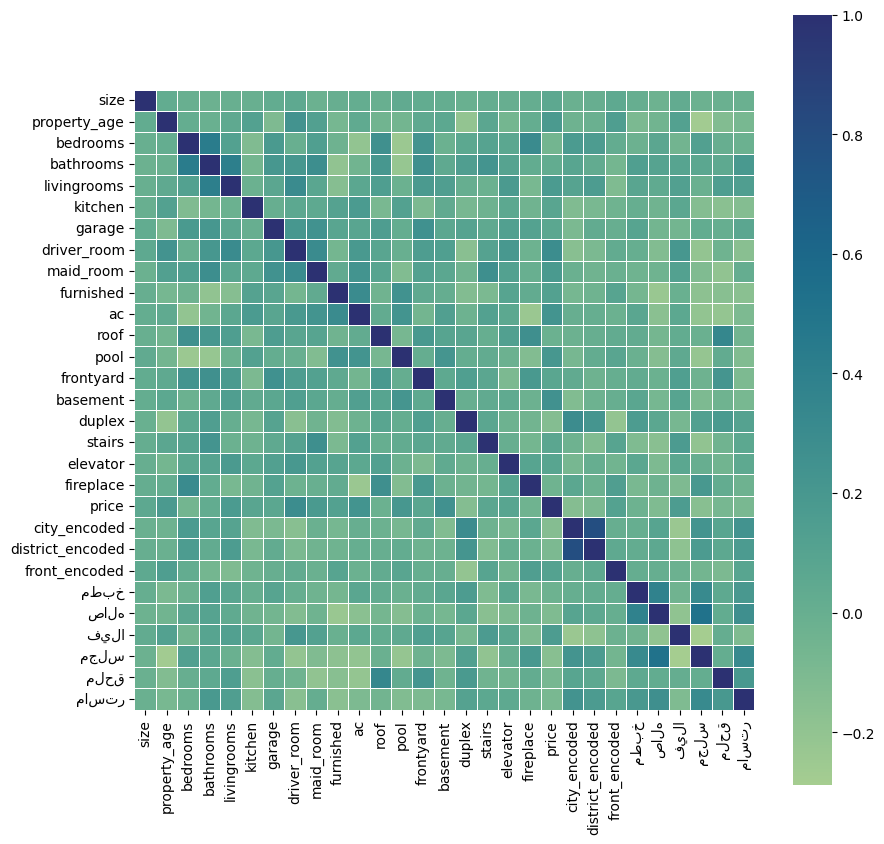

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, square = True, cmap= 'crest', linewidth = 0.5)
plt.show()

Mean Squared Error: 3540340522.234845
R^2 Score: 0.24625900553800306


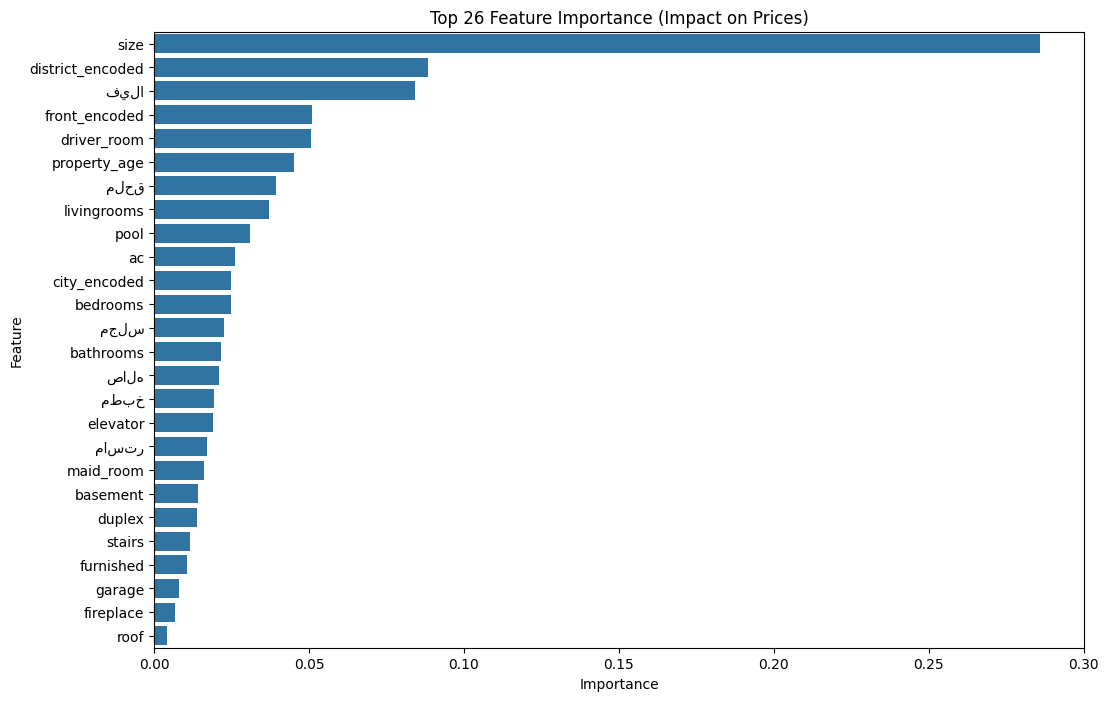

In [73]:
#Dropping any objects
df_New_clean = df.drop(columns=['city', 'district', 'front', 'details'], axis=1, errors='ignore')
#Drop missing Values
df_New_clean = df_New_clean.dropna(subset=['price'])
# X  The feature set, which includes all columns except for the price
# Y The target variable (price), which we want to predict using the features in
X = df_New_clean.drop(columns=['price'], axis=1)
y = df_New_clean['price']
# Imputation for missing values
imputer = SimpleImputer(strategy='median')  # Use 'median' for numeric columns
X_imputed = imputer.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Get the feature names after excluding 'city', 'district', 'front', and 'details'
feature_names = list(X.columns)
# Calculate and plot feature importance
importances = model.feature_importances_
# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Limit the plot to top 20 important features (or adjust as needed)
top_n = 26
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top '+str(top_n)+' Feature Importance (Impact on Prices)')
plt.show()